
# Perkenalan
---

Nama : Muhammad Afif Alvan

Batch: FTDS-016-rmt

## Query
---

```
select 
limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month

from bigquery-public-data.ml_datasets.credit_card_default
limit 31952
```

## Description
---

Data ini berisikan record default credit card dari bulan April sampai dengan September 2015.

## Objective
---

Membuat model machine learning untuk memprediksi pembayaran bulan depan setiap data id berdasarkan record credit card dari bulan april sampai september 2015.

# Import Libraries
---

In [1]:

# Data Processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import MinMaxScaler

# Feature Selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Modeling Data
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

# Hyperparameter
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

# Evaluation Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Training Model


# Model Evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# Model Inference
import joblib
import json



# Data Loading
---

Data ini nantinya akan dibagi kedalam dua bagian:

1. Data Latih (Training) = 70%
2. Data Uji (Testing) = 30%

In [2]:
# Loading Data with Pandas
df = pd.read_csv('h8dsft_P1M1_Muhammad_Afif_Alvan.csv')

In [3]:
# Display Head of Data
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,3,0,50,0,0,0,-1,-1,...,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,2,3,0,45,-2,-2,-2,-2,-2,...,399,1396,0,2430,0,399,1396,0,0,0
2,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000,1,2,1,42,0,0,0,0,0,...,31320,36227,35569,2007,2000,1500,5400,0,3000,0


In [4]:
# Display Tail of Data
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,320000,1,2,1,41,1,-2,-2,-2,-2,...,0,700,860,0,0,0,700,860,2420,1
2961,20000,1,1,1,39,-1,-1,-1,-1,-1,...,630,664,598,700,600,700,700,600,1400,0
2962,20000,1,2,2,25,0,0,0,0,0,...,16600,17025,17381,1300,1300,1300,700,630,650,0
2963,50000,1,2,2,38,0,0,0,0,0,...,17833,18246,18642,1300,1600,650,700,700,700,0
2964,100000,2,1,2,28,0,0,0,2,0,...,10775,10998,12655,1300,3005,0,700,2000,1500,0


In [5]:
# Dimension of Data
print(df.shape)

(2965, 24)


- Data ini memiliki `2.965 row` dan `24 columns`

In [6]:
# Attribute Cheking Values
attributes = df.columns.values
print(attributes)

['limit_balance' 'sex' 'education_level' 'marital_status' 'age' 'pay_0'
 'pay_2' 'pay_3' 'pay_4' 'pay_5' 'pay_6' 'bill_amt_1' 'bill_amt_2'
 'bill_amt_3' 'bill_amt_4' 'bill_amt_5' 'bill_amt_6' 'pay_amt_1'
 'pay_amt_2' 'pay_amt_3' 'pay_amt_4' 'pay_amt_5' 'pay_amt_6'
 'default_payment_next_month']


- Kolom yang terdapat pada dataset

In [7]:
# Rename Columns

df.rename(columns = {
       'limit_balance':'jumlah_kredit',
        'sex':'gender',
        'education_level' : 'pendidikan',
        'age':'umur',
        'pay_0' : 'repayment',
        'bill_amt_1' : 'jumlah_tagihan',
        'pay_amt_1' : 'jumlah_pembayaran',
        'default_payment_next_month': 'status_bayar'
}, inplace=True)

In [8]:
# Checking type from Attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   jumlah_kredit      2965 non-null   int64
 1   gender             2965 non-null   int64
 2   pendidikan         2965 non-null   int64
 3   marital_status     2965 non-null   int64
 4   umur               2965 non-null   int64
 5   repayment          2965 non-null   int64
 6   pay_2              2965 non-null   int64
 7   pay_3              2965 non-null   int64
 8   pay_4              2965 non-null   int64
 9   pay_5              2965 non-null   int64
 10  pay_6              2965 non-null   int64
 11  jumlah_tagihan     2965 non-null   int64
 12  bill_amt_2         2965 non-null   int64
 13  bill_amt_3         2965 non-null   int64
 14  bill_amt_4         2965 non-null   int64
 15  bill_amt_5         2965 non-null   int64
 16  bill_amt_6         2965 non-null   int64
 17  jumlah_pembaya

- Pada dataset ini terdiri dari `2.965 jumlah data` dengan `24 columns`. Dengan data semua data bertype `integer`
- Ada sebagian data seperti `gender, pendidikan, marital_status` yang sebenarnya adalah data string yang telah diubah menjadi integer untuk mempermudah saat proses permodelan.

In [9]:
# Check Dataset
df.describe()

,jumlah_kredit,gender,pendidikan,marital_status,umur,repayment,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,jumlah_pembayaran,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,status_bayar
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


- Pada data default_credit_card diketahui client dengan umur paling muda adalah `21 tahun` dan pemilik kartu kredit paling tua adalah umur `69 tahun` dengan rata-rata umur client credit di umur `35 tahun`. 
- Client dengan keterlambatan pembayaran paling lama adalah `7 bulan` keterlambatan yang baru dibayar pada `september 2005`.
- Terdapat client yang memiliki tagihan kartu kredit `sebesar 800.000 Dollar NT`

# Exploratory Data Analysis (EDA)
---

## Data Description

Keterangan :

1. Limit_balance : Jumlah Kredit yang diberkan
2. Sex : Gender (1 = Male, 2 = Female)
3. education_level : Tingkat Pendidikan (1 = S2, 2 = Universitas, S3 = SMA, 4 = Other, 5&6 = Tidak diketahui)
4. marital_status : status pernikahan (1 = Menikah, 2 = Lajang, 3 = yang lainnya)
5. Age : Umur dalam tahun

6. Pay_0 : Pelunasan bulan september (-1 = Keterlambatan pembayaran satu bulan)
7. Pay_2 : Pelunasan bulan Agustus (-1 = Keterlambatan pembayaran satu bulan)
8. Pay_3 : Pelunasan bulan Juli (-1 = Keterlambatan pembayaran satu bulan)
9. Pay_4 : Pelunasan bulan Juni (-1 = Keterlambatan pembayaran satu bulan)
10. Pay_5 : Pelunasan bulan Mei (-1 = Keterlambatan pembayaran satu bulan)
11. Pay_6 : Pelunasan bulan April (-1 = Keterlambatan pembayaran satu bulan)

12. bill_amt_1 : Jumlah tagihan pada bulan september
13. bill_amt_2 : Jumlah tagihan pada bulan Agustus
14. bill_amt_3 : Jumlah tagihan pada bulan Juli
15. bill_amt_4 : Jumlah tagihan pada bulan Juni
16. bill_amt_5 : Jumlah tagihan pada bulan Mei
17. bill_amt_6 : Jumlah tagihan pada bulan April

18. Pay_amt_1 : Jumlah pembayaran sebelum bulan september
19. Pay_amt_2 : Jumlah pembayaran sebelum bulan Agustus
20. Pay_amt_3 : Jumlah pembayaran sebelum bulan Juli
21. Pay_amt_4 : Jumlah pembayaran sebelum bulan Juni
22. Pay_amt_5 : Jumlah pembayaran sebelum bulan Mei
23. Pay_amt_6 : Jumlah pembayaran sebelum bulan April

default_payment_next_month : Pembayaran default (1 = yes, 0 = No)


## Checking Correlation

<AxesSubplot: title={'center': 'Histogram Data Credit Card'}>

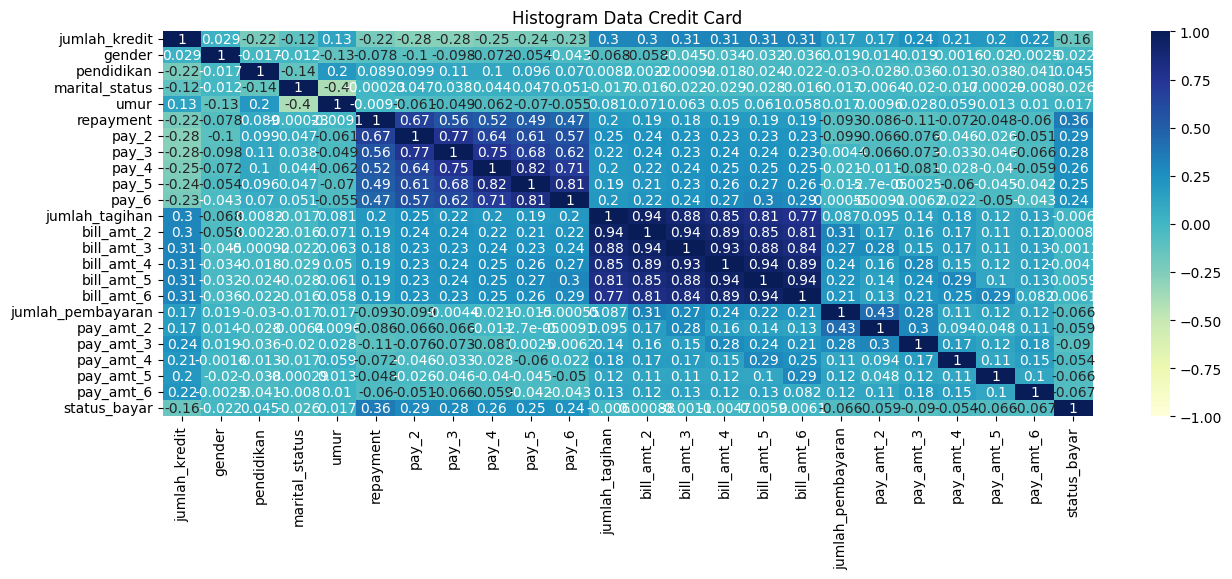

In [10]:
plt.figure(figsize=(15,5))
plt.title('Histogram Data Credit Card')
sns.heatmap(df.corr(), vmin= -1, vmax= 1, cmap = 'YlGnBu', annot=True)

Terlihat pada data korelasi menggunakan `heatmap` beberapa feature memiliki korelasi yang rendah dengan target(`status_bayar`). Akan tetapi ada beberapa feature yang perlu di gunakan untuk pembuatan model dan membantu analisis hasil seperti `gender, pendidikan, marital_status, umur`. Pada pay_2 sampai pay_6 akan di drop karena status pelunasan dan nilai keterlambatan pelunasan sudah diwakilkan oleh feature `repayment` yang berisi pelunasan bulan terbaru yaitu `september`. Untuk feature bill_amt_2 sampai bill_amt_6 sudah diwakilkan feature `jumlah_tagihan` yang berisi jumlah tagihan bulan september. Untuk feature pay_amt_1 sampai dengan pay_amt 6 sudah diwakilkan feature `jumlah_pembayaran` yang berisikan nilai jumlah pembayaran sebelum bulan september.

Sehingga pada kali ini hanya digunakan feature `gender, pendidikan, marital_status, umur,jumlah_kredit, repayment, jumlah_tagihan, jumlah_pembayaran dan status_bayar`

In [11]:
# drop feature

df = df.drop(['pay_2','pay_3','pay_4','pay_5','pay_6','bill_amt_2',
              'bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6', 
              'pay_amt_2', 'pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6',], axis =1)

## Missing Value

In [12]:
# Check Missing Value
df.isna().sum()

jumlah_kredit        0
gender               0
pendidikan           0
marital_status       0
umur                 0
repayment            0
jumlah_tagihan       0
jumlah_pembayaran    0
status_bayar         0
dtype: int64

- Tidak terdapat missing value pada dataset dalam artian semua data memiliki value

## Visualization


### Create Function

In [13]:
# Distribution function visualization
def plots(df, variable):
    #create Canvas
    plt.figure(figsize=(15,5))
    
    #histogram
    plt.subplot(1,2,1)
    plt.title('Histogram ' + variable)
    sns.histplot(df[variable], color = 'b', bins = 5)
    
    
    #boxplot
    plt.subplot(1, 2, 2)
    plt.title('Boxplot ' + variable)
    sns.boxplot(y=df[variable], )
    

    plt.show()
    
    #skewness
    print(f'Nilai Skewness '+ variable,':', df[variable].skew())
    
# explorasi data function visualization
def explore(df, x):
    #create Canvas
    plt.figure(figsize=(15,5))

    #Pie Chart
    plt.title('Pie chart ' + x)
    plt.legend()
    df.groupby([x]).size().plot(
    kind='pie',
    autopct='%.1f%%',
    explode=[0,0.09], 
    cmap='winter',
    shadow=True,   
    )
           
    #boxplot
    plt.figure(figsize=(15,5))
    df.groupby(x).agg({x:'count'}).plot(
        kind ='bar')
    plt.title('Barplot ')
    plt.legend()

    plt.show()

### Data Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


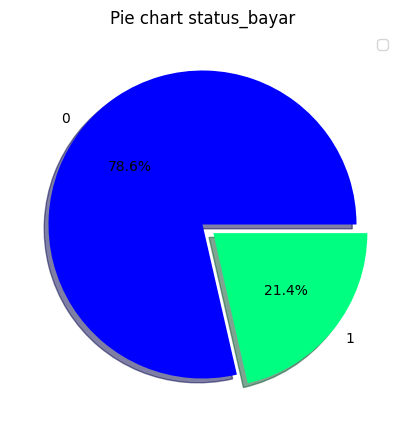

<Figure size 1500x500 with 0 Axes>

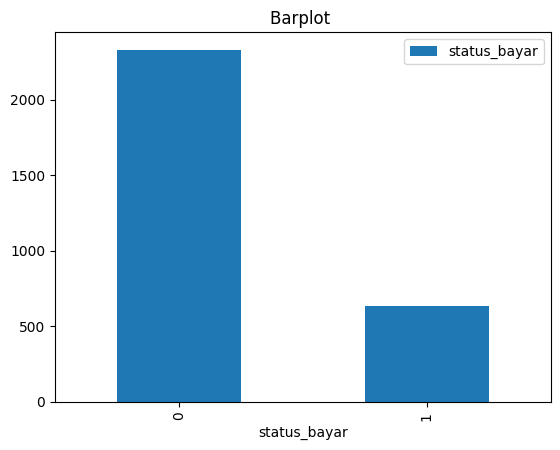

In [14]:
# Explorasi Target
explore(df, 'status_bayar')

**Analisis**
1. Persentase `status_bayar` untuk label 1 yang artinya `yes` sebesar `21.4%` dan label 0 yang artinya `no` sebesar `78.6%`. Lebih banyak user yang tidak melakukan pembayaran untuk bulan depan.
2. Ada imbalanced pada sampel dataset, label 0 bernilai 3x lebih banyak dibandingkan label 1.

<AxesSubplot: >

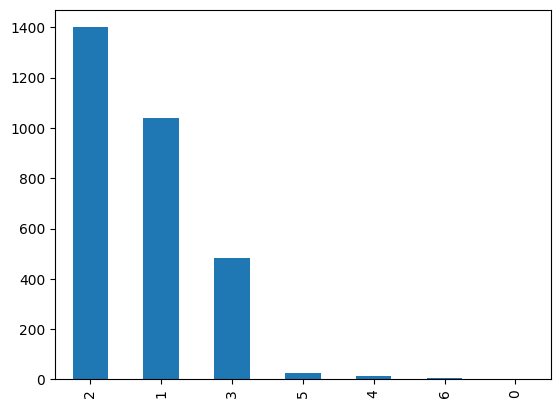

In [15]:
df['pendidikan'].value_counts().plot(kind='bar')

Setelah dilihat melalui bar plot tingkat pendidikan, ternyata banyak dari client yang memiliki kredit pinjaman yang berasal dari Universitas atau mahasiswa S1.

<AxesSubplot: xlabel='pendidikan', ylabel='jumlah_kredit'>

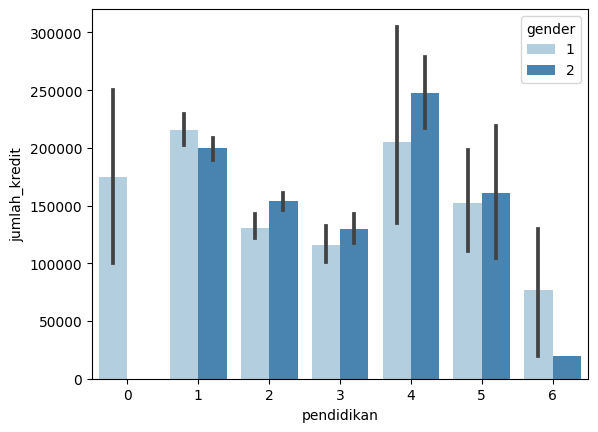

In [16]:
# creat barplot
sns.barplot(x= df['pendidikan'], y = df['jumlah_kredit'], hue = df['gender'], data = df, palette='Blues')

Disimpulkan bahwa tidak ada perempuan yang tidak memiliki `jumlah_kredit`. Akan tetapi untuk perempuan dengan tingkat pendidikan yang tidak diketahui memiliki jumlah kredit paling tinggi dibandingakan laki-laki

## Visualization for Distribution

In [17]:
# Check feature name
features = df.columns.values
print(features)

['jumlah_kredit' 'gender' 'pendidikan' 'marital_status' 'umur' 'repayment'
 'jumlah_tagihan' 'jumlah_pembayaran' 'status_bayar']


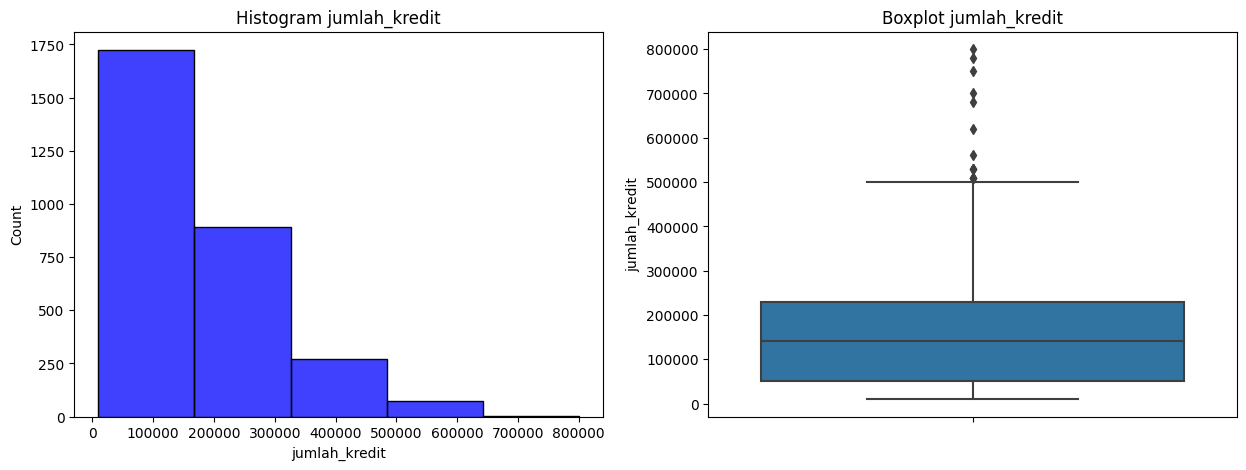

Nilai Skewness jumlah_kredit : 1.0004416437793329


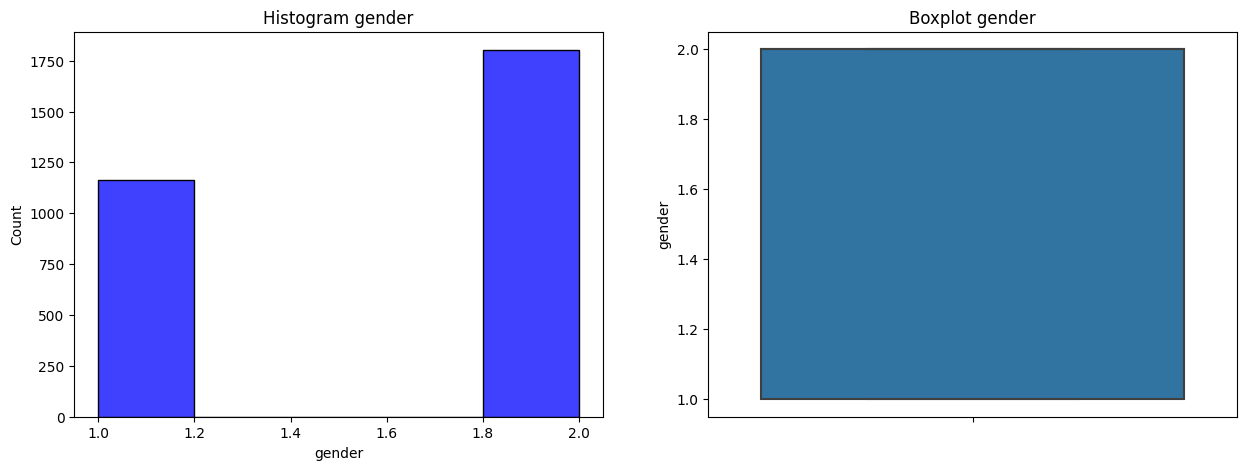

Nilai Skewness gender : -0.4416247499021919


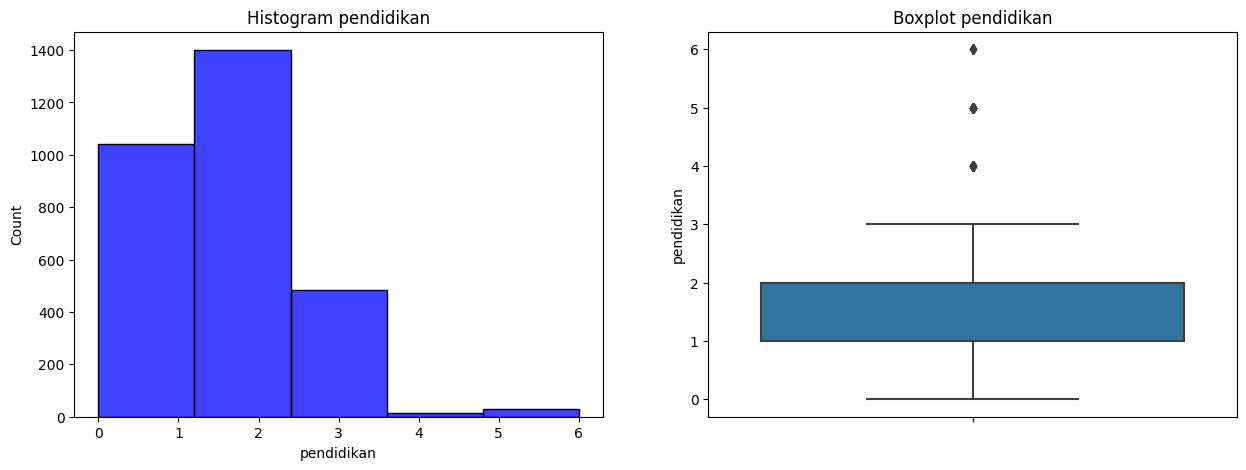

Nilai Skewness pendidikan : 0.8998745069033062


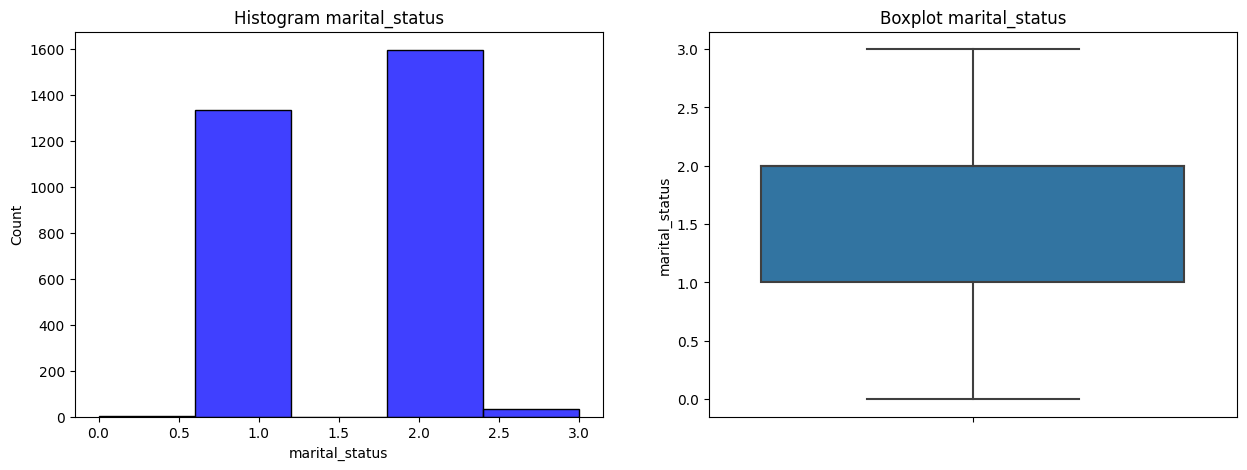

Nilai Skewness marital_status : -0.02010592663695769


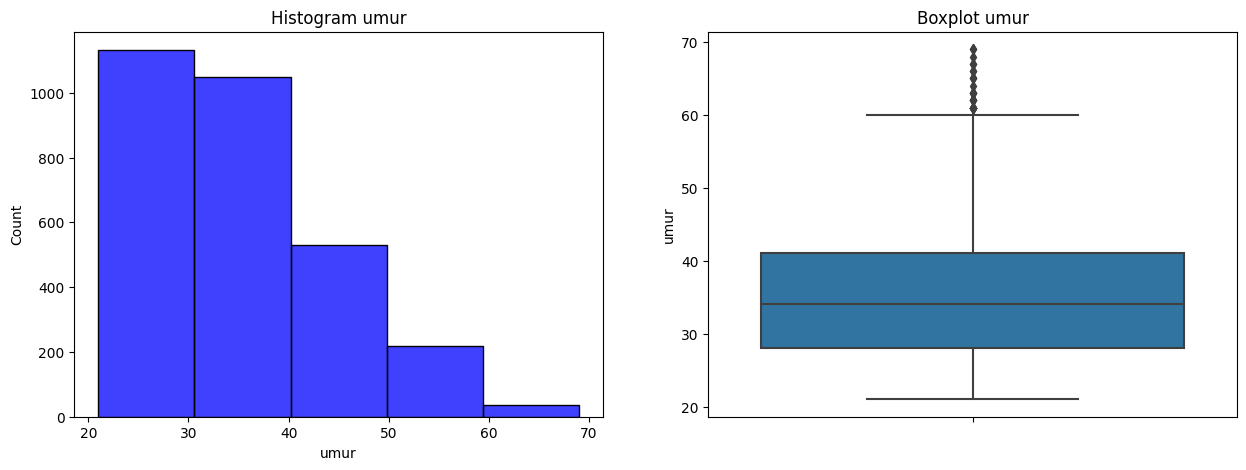

Nilai Skewness umur : 0.7728871800647298


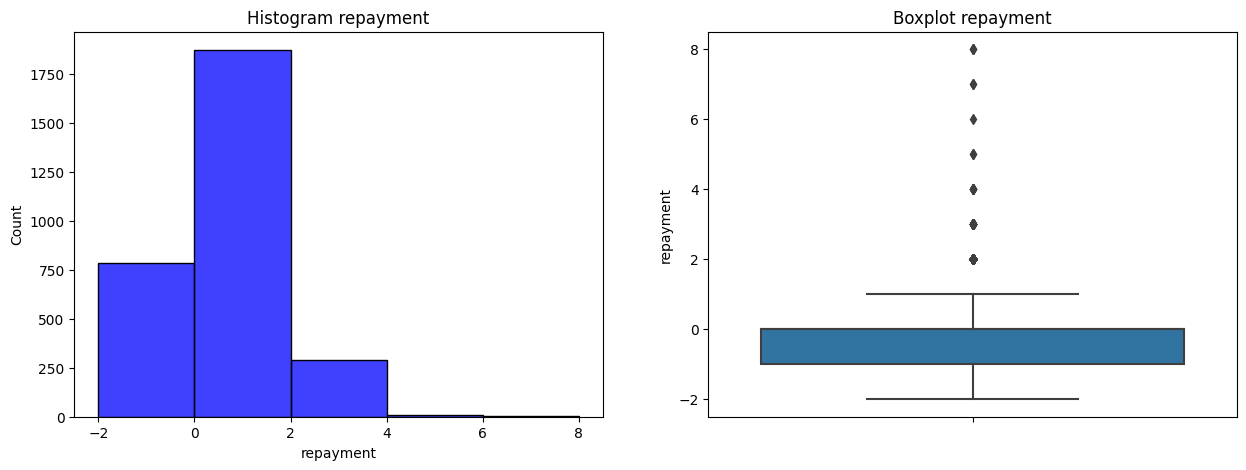

Nilai Skewness repayment : 0.9267902583584399


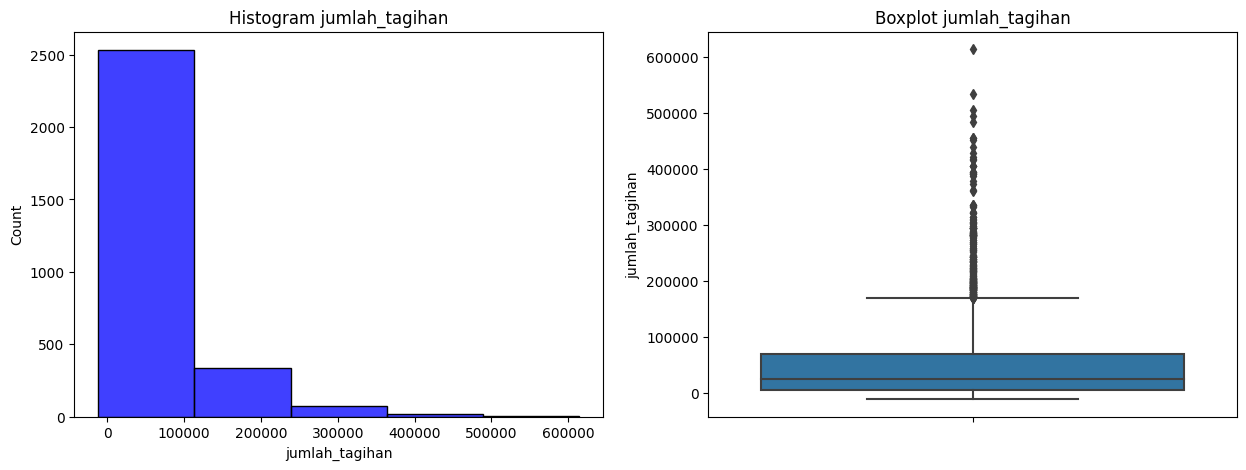

Nilai Skewness jumlah_tagihan : 2.4845979515192678


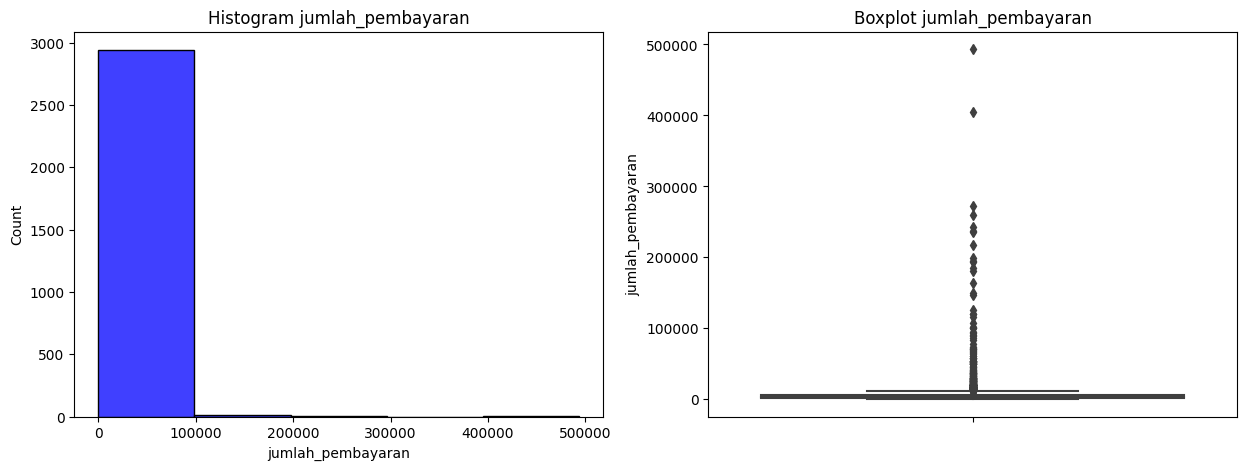

Nilai Skewness jumlah_pembayaran : 11.877646508452141


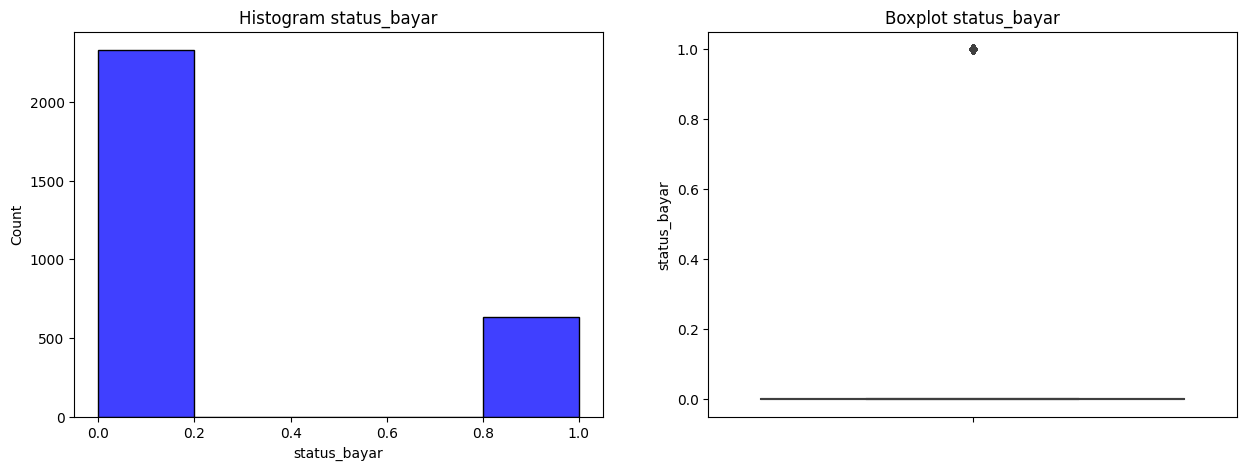

Nilai Skewness status_bayar : 1.3941987094851698


In [18]:
# Features label
features = df.columns.values
# looping for plot
for i in features:
    plots(df, i)

- Setelah melakukan visualisasi pada dataset didapatkan insight sebagai berikut:


1. Semua feature berdistribusi `tidak normal` dengan `right-skewness` kecuali feature `gender dan marital_status`.

2. Selain feature `status_bayar` dan `jumlah_pembayaran` akan dilakukan handling outlier `trimming` untuk membuang nilai yang berada diatas `upper limit`.

3. Semua outlier yang terdeteksi berada di atas nilai maksimum.

4. Untuk `jumlah pembayaran dan status bayar` akan di handling menggunakan capping.

# Data Preprocessing
---

## Model Inference

In [19]:
# create inference data
data_inf = df.sample(20, random_state = 11)
data_inf

,jumlah_kredit,gender,pendidikan,marital_status,umur,repayment,jumlah_tagihan,jumlah_pembayaran,status_bayar
2332,70000,2,1,2,23,-2,-22,0,0
330,240000,2,1,1,41,0,102488,6500,0
1536,180000,2,1,2,35,-1,11123,7936,0
2322,20000,1,2,2,24,2,4127,1500,1
200,240000,1,2,1,34,0,242805,10000,0
880,50000,1,2,2,39,0,26813,1708,0
1303,200000,1,1,2,42,-2,470,740,0
1608,150000,2,2,1,32,0,21274,11540,0
376,20000,1,3,1,60,1,17495,0,0
361,210000,2,2,1,37,0,22908,32513,1


In [20]:
# Create train_test
data_train_test = df.drop(data_inf.index)
data_train_test

,jumlah_kredit,gender,pendidikan,marital_status,umur,repayment,jumlah_tagihan,jumlah_pembayaran,status_bayar
0,50000,1,3,0,50,0,45771,2266,0
1,200000,2,3,0,45,-2,399,2430,0
2,130000,1,1,1,45,0,58180,2886,0
3,230000,1,2,1,41,0,301038,9405,1
4,50000,1,2,1,42,0,35892,2007,0
...,...,...,...,...,...,...,...,...,...
2960,320000,1,2,1,41,1,0,0,1
2961,20000,1,1,1,39,-1,628,700,0
2962,20000,1,2,2,25,0,13429,1300,0
2963,50000,1,2,2,38,0,42856,1300,0


In [21]:
#Reset index
data_train_test.reset_index(drop = True, inplace = True)
data_inf.reset_index(drop =True, inplace=True)
data_inf

,jumlah_kredit,gender,pendidikan,marital_status,umur,repayment,jumlah_tagihan,jumlah_pembayaran,status_bayar
0,70000,2,1,2,23,-2,-22,0,0
1,240000,2,1,1,41,0,102488,6500,0
2,180000,2,1,2,35,-1,11123,7936,0
3,20000,1,2,2,24,2,4127,1500,1
4,240000,1,2,1,34,0,242805,10000,0
5,50000,1,2,2,39,0,26813,1708,0
6,200000,1,1,2,42,-2,470,740,0
7,150000,2,2,1,32,0,21274,11540,0
8,20000,1,3,1,60,1,17495,0,0
9,210000,2,2,1,37,0,22908,32513,1


- Pada tahap ini sudah dipisahkan antara data train test yang digunakan untuk membuat model mechine learning dengan data inference sebanyak `20` baris data.

## Splitting Feature and Target

In [22]:
# Splitting x(feature) and y(target)
x = data_train_test.drop(['status_bayar'], axis =1)
y = data_train_test['status_bayar']

Dalam hal ini yang berlaku sebagai varibel dependen adalah `status_bayar` dan sisanya adalah variable Independen.

## Splitting train set and test set

Train dan test di bagi dengan proporsi `70%` untuk Train dan `30%` untuk Test

In [23]:
# Splitting train_Set and test_set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =17)

# Shape of set

print('Train Size: ', x_train.shape)
print('Test Size: ', x_test.shape)

Train Size:  (2061, 8)
Test Size:  (884, 8)


- Train Size memiliki `2.061` jumlah data dan `8` features
- Test Size memiliki `884` jumlah data dan `8` features

## Handling Outlier 

### Detection Outlier


In [24]:
# create function detection outlier

def find_outlier(df, variable, nilai):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_limit = df[variable].quantile(0.25) - (IQR * nilai)
    upper_limit = df[variable].quantile(0.75) + (IQR * nilai)

    return upper_limit, lower_limit

In [25]:
variable = x_train.columns.values
variable

array(['jumlah_kredit', 'gender', 'pendidikan', 'marital_status', 'umur',
       'repayment', 'jumlah_tagihan', 'jumlah_pembayaran'], dtype=object)

In [26]:
# Limits for `jumlah_kredit`
jk_upper_limit, jk_lower_limit = find_outlier(x_train, 'jumlah_kredit', 1.5)
jk_upper_limit, jk_lower_limit

# Limits for `pendidikan`
p_upper_limit, p_lower_limit = find_outlier(x_train, 'pendidikan', 1.5)
p_upper_limit, p_lower_limit

# Limits for `repayment`
r_upper_limit, r_lower_limit = find_outlier(x_train, 'repayment', 1.5)
r_upper_limit, r_lower_limit

# Limits for `umur`
u_upper_limit, u_lower_limit = find_outlier(x_train, 'umur', 1.5)
u_upper_limit, u_lower_limit

# Limits for `jumlah_tagihan`
jt_upper_limit, jt_lower_limit = find_outlier(x_train, 'jumlah_tagihan', 1.5)
jt_upper_limit, jt_lower_limit

# Limits for `jumlah_pembayaran`
jp_upper_limit, jp_lower_limit = find_outlier(x_train, 'jumlah_pembayaran', 3)
jp_upper_limit, jp_lower_limit

print('jk_upper_limit : ', jk_upper_limit)
print('jk_lower_limit : ', jk_lower_limit, '\n')
print('p_upper_limit : ', p_upper_limit)
print('p_lower_limit : ', p_lower_limit, '\n')
print('r_upper_limit : ', r_upper_limit)
print('r_lower_limit : ', r_lower_limit, '\n')
print('u_upper_limit : ', u_upper_limit)
print('u_lower_limit : ', u_lower_limit,'\n')
print('jt_upper_limit : ', jt_upper_limit)
print('jt_lower_limit : ', jt_lower_limit, '\n')
print('jp_upper_limit : ', jp_upper_limit)
print('_lower_limit : ', jp_lower_limit)



jk_upper_limit :  525000.0
jk_lower_limit :  -235000.0 

p_upper_limit :  3.5
p_lower_limit :  -0.5 

r_upper_limit :  1.5
r_lower_limit :  -2.5 

u_upper_limit :  60.5
u_lower_limit :  8.5 

jt_upper_limit :  168541.5
jt_lower_limit :  -94310.5 

jp_upper_limit :  16965.0
_lower_limit :  -10944.0


### Trimming outlier

In [27]:
# Flag the outliers in category `Jumlah Kredit`
outliers_jk = np.where(x_train['jumlah_kredit'] > jk_upper_limit, True,
                       np.where(x_train['jumlah_kredit'] < jk_lower_limit, True, False))

# Flag the outliers in category `Pendidikan`
outliers_p = np.where(x_train['pendidikan'] > p_upper_limit, True,
                       np.where(x_train['pendidikan'] < p_lower_limit, True, False))

# Flag the outliers in category `repayment`
outliers_r = np.where(x_train['repayment'] > r_upper_limit, True,
                       np.where(x_train['repayment'] < r_lower_limit, True, False))

# Flag the outliers in category `umur`
outliers_u = np.where(x_train['umur'] > u_upper_limit, True,
                       np.where(x_train['umur'] < u_lower_limit, True, False))

# Flag the outliers in category `jumlah tagihan`
outliers_jt = np.where(x_train['jumlah_tagihan'] > jt_upper_limit, True,
                       np.where(x_train['jumlah_tagihan'] < jt_lower_limit, True, False))
# Flag the outliers in category `jumlah_pembayaran`
outliers_jp = np.where(x_train['jumlah_pembayaran'] > jp_upper_limit, True,
                       np.where(x_train['jumlah_pembayaran'] < jp_lower_limit, True, False))
print(outliers_jk[:10])

[ True False False False False False False False False False]


In [28]:
# Let's trimm the dataset

x_train_trimmed = x_train.loc[~(outliers_jk + outliers_p + outliers_r + outliers_u + outliers_jt + outliers_jp)]
print('Size dataset - Before trimming : ', x_train.shape)
print('Size dataset - After trimming  : ', x_train_trimmed.shape)

Size dataset - Before trimming :  (2061, 8)
Size dataset - After trimming  :  (1578, 8)


In [29]:
# Drop y_train with x_train_trimmed index
y_train = y_train.loc[x_train_trimmed.index]
len(y_train)

1578

In [30]:
# Variable name
x_train = x_train_trimmed

## Handling Missing Value

In [31]:
# missing value in x_train
x_train.isna().sum()

jumlah_kredit        0
gender               0
pendidikan           0
marital_status       0
umur                 0
repayment            0
jumlah_tagihan       0
jumlah_pembayaran    0
dtype: int64

In [32]:
# missing value at y_train
y_train.isna().sum()

0

In [33]:
# missing value in x_test
x_test.isna().sum()

jumlah_kredit        0
gender               0
pendidikan           0
marital_status       0
umur                 0
repayment            0
jumlah_tagihan       0
jumlah_pembayaran    0
dtype: int64

In [34]:
#Missing value in y_test
y_test.isna().sum()

0

Pada pengecekan missing value untuk data train dan data test memiliki hasil `tidak adanya` data yang missing di dalamnya.

## Feature Selection 

Feature Selection digunakan untuk memilih fitur yang berpengaruh paling optimal dan mengesampingkan feature yang tidak berpengaruh.
1. Feature Numeric Target Numeric : pearson's atau spearman
2. Feature Numeric Target Category : Anova atau Kendall's

Dalam kasus data credit_card_default diketahui bahwa taget adalah `Numeric` dengan seluruh featurenya adalah `Numeric` sehingga akan dilakukan feature selection menggunakan `pearson's`.



<AxesSubplot: title={'center': 'Histogram of x_train'}>

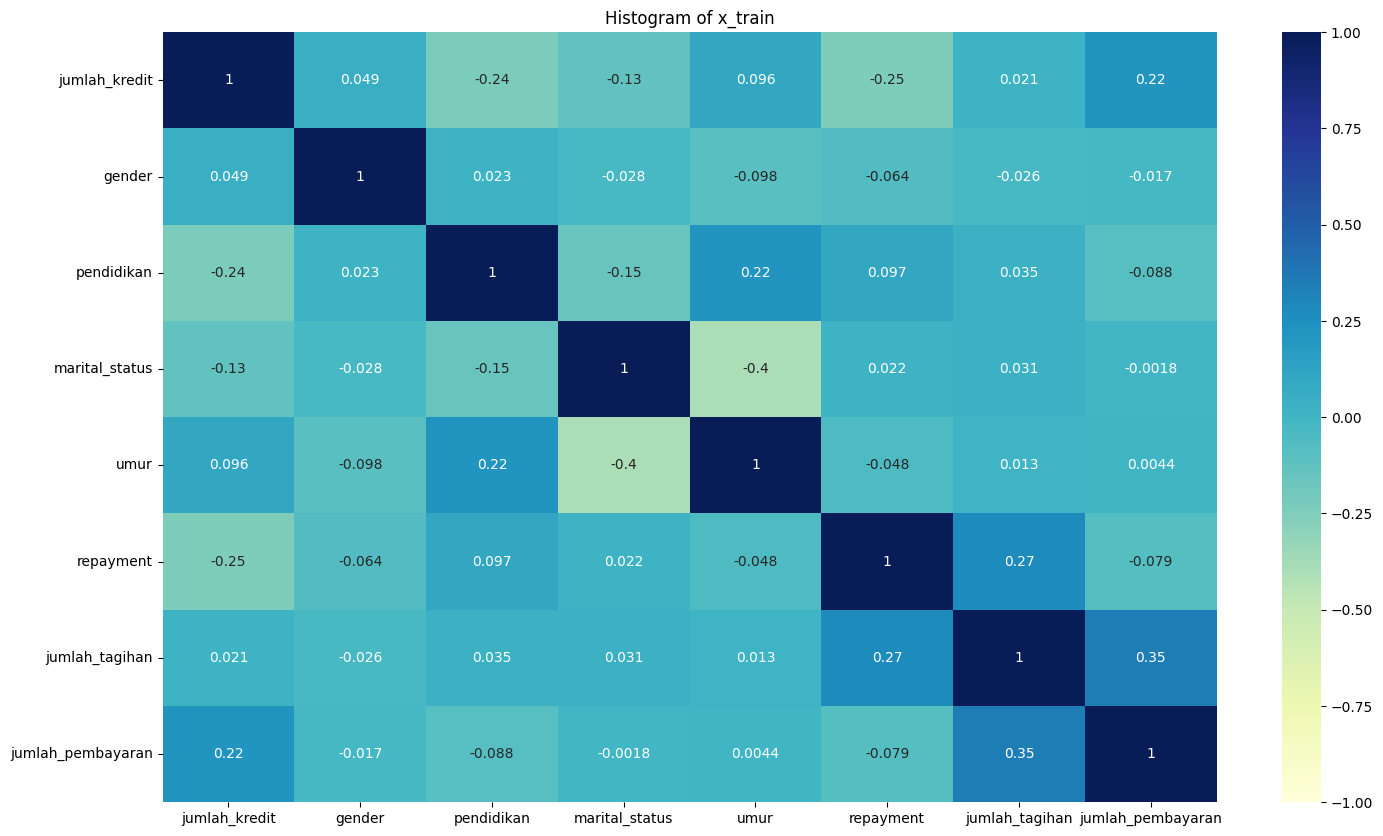

In [35]:
# Histogram for pearson
plt.figure(figsize=(17,10))
plt.title('Histogram of x_train')
sns.heatmap(x_train.corr(), vmin= -1, vmax= 1, cmap = 'YlGnBu', annot=True)

Pada Visualisasi untuk x_train di temukan bahwa `jumlah_tagihan` dan `jumlah_pembayaran` memiliki korelasi yang tinggi antar keduanya. Hal tersebut sesuai dengan teori dimana `jumlah pembayaran` akan sesuai dengan `jumlah tagihan`.
Sedangkan untuk `marital_status` memiliki korelasi dengan `umur`. Sehingga diantaranya akan diambil salah satu. Disini saya mengambil `jumlah_tagihan` dan `marital_status`.

In [36]:
#Drop feature
x_train = x_train.drop(['jumlah_pembayaran','umur'], axis = 1)
x_test = x_test.drop(['jumlah_pembayaran','umur'], axis = 1)

## Feature Scaling

Seluruh data pada dataset ini merupakan data numerical. Sehingga tidak ada `splitting numerical and catagorical`. 
Untuk perlakuan hanya dilakukan `Scaling` untuk data numeric dan tidak ada `Encoding`.

In [37]:
# Splitting num and cat
num_columns = x_train.select_dtypes(include=np.number).columns.tolist()

print('Numerical Columns   : ', num_columns, '\n')


Numerical Columns   :  ['jumlah_kredit', 'gender', 'pendidikan', 'marital_status', 'repayment', 'jumlah_tagihan'] 



In [38]:
# Split Train-Set and Test-Set based on Column Types

x_train_num = x_train[num_columns]
x_test_num = x_test[num_columns]


In [39]:
#Feature scaling with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train_num)

x_test_num_scaled = scaler.transform(x_test_num)
x_train_num_scaled = scaler.transform(x_train_num)
x_train_num_scaled

array([[0.65306122, 1.        , 0.5       , 0.33333333, 0.        ,
        0.06411716],
       [0.08163265, 1.        , 0.5       , 0.33333333, 0.66666667,
        0.14916612],
       [0.40816327, 1.        , 0.5       , 0.33333333, 0.66666667,
        0.27042502],
       ...,
       [0.44897959, 1.        , 0.5       , 0.66666667, 1.        ,
        0.06593877],
       [0.08163265, 0.        , 0.5       , 0.66666667, 0.66666667,
        0.09337391],
       [0.20408163, 1.        , 0.        , 0.66666667, 0.66666667,
        0.34888732]])

In [40]:
# Create Data Frame
x_test_final= pd.DataFrame(x_test_num_scaled, columns=[num_columns])
x_train_final = pd.DataFrame(x_train_num_scaled, columns=[num_columns])
x_test_final

,jumlah_kredit,gender,pendidikan,marital_status,repayment,jumlah_tagihan
0,0.163265,1.0,1.0,0.333333,0.333333,0.070237
1,0.551020,1.0,0.0,0.666667,0.333333,0.317009
2,0.306122,0.0,0.5,0.333333,0.666667,0.253892
3,0.244898,1.0,0.0,0.666667,1.000000,0.064117
4,0.265306,1.0,0.5,0.666667,0.666667,0.812658
...,...,...,...,...,...,...
879,0.551020,0.0,0.0,0.666667,0.333333,0.066883
880,0.734694,0.0,0.0,0.333333,1.000000,0.064117
881,0.183673,1.0,0.5,0.333333,1.000000,0.605684
882,0.591837,1.0,0.0,0.666667,0.666667,0.550286


Data telah selesai untuk preprocessing. Data sudah tidak memiliki `outlier, missing value dan memiliki rentang yang sama`. Sehingga data ini sudah siap untuk dilakukan permodelan untuk memprediksi `status_bayar` pada dataset `credit_card_deafult`

# Model Defination
---


**Introduction**

Model definition disini akan menjelaskan algoritma  model yang akan digunakan untuk memprediksi `status_bayar` pada dataset `credit_card_default`. 
Model yang digunakan:

1. Decision Tree : 
2. Random Forest :
3. Linear Regression :
4. Logistic Regression : 
5. KNN :
6. Naive Bayes :
7. Support Vector Machine (SVM) : 
8. Adaboost :

Pada Proses Cross Validation di berikan nilai fold sebanyak 10. Dimana data dibagi menjadi dua, train dan test sebanyak 10 kali. 


## Decision Tree

In [41]:
# Creat model default
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train_final, y_train)

DecisionTreeClassifier()

In [42]:
# Check score deafault Decision Tree
print('Training set score: {:.4f}'.format(model_dt.score(x_train_final, y_train)))
print('Test set score: {:.4f}'.format(model_dt.score(x_test_final, y_test)))

Training set score: 0.9943
Test set score: 0.6663


Didapatkan hasil score model pada train sangat bagus yaitu 1 yang artinya model dapat memprediksi dengan sempurna nilai pada data train. Akan tetapi ketika pada data test nilai scorenya turun sebanyak 0.3. Ini menandakan model tersebut termasuk Overfitting atau terlalu mempelajari data train.

Sehingga diperlukannya parameter tuning untuk menentukan parameter yang tepat untuk decision tree.


### Cross Validation

In [43]:
# CV Decision Tree

score_dt_test = cross_val_score(model_dt, x_test_final, y_test, cv = 10)
score_dt = cross_val_score(model_dt, x_train_final, y_train, cv = 10)

print('Score 10 Cross Validation: ', format(score_dt),'\n')
print(f'Score mean 10 Cross Validation: ', format(score_dt.mean()))
print(f'Score Standar deviasi 10 Cross Validation: ', format(score_dt.std()))

Score 10 Cross Validation:  [0.77848101 0.79746835 0.73417722 0.81012658 0.77848101 0.7721519
 0.78481013 0.79113924 0.72611465 0.77707006] 

Score mean 10 Cross Validation:  0.775002015641377
Score Standar deviasi 10 Cross Validation:  0.02487634687532553


## Random Forest

In [44]:
# Creat model Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(x_train_final, y_train)

RandomForestClassifier()

In [45]:
# Check score deafault Random Forest
print('Training set score: {:.5f}'.format(model_rf.score(x_train_final, y_train)))
print('Test set score: {:.5f}'.format(model_rf.score(x_test_final, y_test)))

Training set score: 0.99430
Test set score: 0.75452


### Cross Validation

In [46]:
# CV Random forest

score_rf_test = cross_val_score(model_rf, x_test_final, y_test, cv = 10)
score_rf = cross_val_score(model_rf, x_train_final, y_train, cv = 10)

print(f'Score 10 Cross Validation: ', format(score_rf),'\n')
print(f'Score mean 10 Cross Validation: ', format(score_rf.mean()))
print(f'Score standar deviasi 10 Cross Validation: ', format(score_rf.std()))

Score 10 Cross Validation:  [0.84177215 0.83544304 0.81012658 0.82278481 0.81012658 0.82911392
 0.79113924 0.83544304 0.84076433 0.82802548] 

Score mean 10 Cross Validation:  0.8244739176005804
Score standar deviasi 10 Cross Validation:  0.015379007675209316


## Linear Regression

In [47]:
# Creat model LR default
model_lr = LinearRegression()
model_lr.fit(x_train_final, y_train)

LinearRegression()

In [48]:
# Check score deafault Linear Regression
print('Training set score: {:.5f}'.format(model_lr.score(x_train_final, y_train)))
print('Test set score: {:.5f}'.format(model_lr.score(x_test_final, y_test)))

Training set score: 0.02728
Test set score: 0.05981


### Cross Validation

In [49]:
# CV Linear Regression

score_lr = cross_val_score(model_lr, x_train_final, y_train, cv = 10)
score_lr_test = cross_val_score(model_lr, x_test_final, y_test, cv = 10)

print(f'Score 10 Cross Validation: ', format(score_lr),'\n')
print(f'Score mean 10 Cross Validation: ', format(score_lr.mean()))
print(f'Score standar deviasi 10 Cross Validation: ', format(score_lr.std()))

Score 10 Cross Validation:  [-0.01332385 -0.01869114  0.02414843 -0.00558835  0.02986032  0.01932431
  0.03302017 -0.01692643  0.0756059   0.03886983] 

Score mean 10 Cross Validation:  0.016629921165135796
Score standar deviasi 10 Cross Validation:  0.028713648860287763


## Logistic Regression

In [50]:
# Creat Default Model
model_log = LogisticRegression()
model_log.fit(x_train_final, y_train) 

LogisticRegression()

In [51]:
# Check score deafault Logistic Regression
print('Training set score: {:.5f}'.format(model_log.score(x_train_final, y_train)))
print('Test set score: {:.5f}'.format(model_log.score(x_test_final, y_test)))

Training set score: 0.84347
Test set score: 0.77602


### Cross Validation

In [52]:
# CV Logistic Regression

score_log = cross_val_score(model_log, x_train_final, y_train, cv = 10)
score_log_test = cross_val_score(model_log, x_test_final, y_test, cv = 10)

print(f'Score 10 Cross Validation: ', format(score_log),'\n')
print(f'Score mean 10 Cross Validation: ', format(score_log.mean()))
print(f'Score standar deviasi 10 Cross Validation: ', format(score_log.std()))

Score 10 Cross Validation:  [0.84810127 0.84177215 0.84177215 0.84177215 0.84177215 0.84177215
 0.84177215 0.84177215 0.84713376 0.84713376] 

Score mean 10 Cross Validation:  0.8434773845037491
Score standar deviasi 10 Cross Validation:  0.0026167372784099744


## KNN

In [53]:
# Creat model Knn default
model_knn = KNeighborsClassifier()
model_knn.fit(x_train_final, y_train)

KNeighborsClassifier()

In [54]:
# Check score deafault KNN
print('Training set score: {:.5f}'.format(model_knn.score(x_train_final, y_train)))
print('Test set score: {:.5f}'.format(model_knn.score(x_test_final, y_test)))

Training set score: 0.86248
Test set score: 0.76923


### Cross Validation

In [55]:
# CV Logistic Regression

score_knn_test = cross_val_score(model_knn, x_test_final, y_test, cv = 10)
score_knn = cross_val_score(model_knn, x_train_final, y_train, cv = 10)

print(f'Score 10 Cross Validation: ', format(score_knn),'\n')
print(f'Score mean 10 Cross Validation: ', format(score_knn.mean()))
print(f'Score standar deviasi 10 Cross Validation: ', format(score_knn.std()))

Score 10 Cross Validation:  [0.86075949 0.84177215 0.82911392 0.84177215 0.82278481 0.79746835
 0.82278481 0.83544304 0.82165605 0.8343949 ] 

Score mean 10 Cross Validation:  0.830794968959123
Score standar deviasi 10 Cross Validation:  0.015807492439379556


## Naive Bais

In [56]:
# Creat Model Naive Bais default
model_nb = GaussianNB()
model_nb.fit(x_train_final, y_train)


GaussianNB()

In [57]:
# Check score deafault Naive Bais
print('Training set score: {:.5f}'.format(model_nb.score(x_train_final, y_train)))
print('Test set score: {:.5f}'.format(model_nb.score(x_test_final, y_test)))

Training set score: 0.84347
Test set score: 0.80317


### Cross Validation

In [58]:
# CV Naive Bais

score_nb_test = cross_val_score(model_nb, x_test_final, y_test, cv = 10)
score_nb = cross_val_score(model_nb, x_train_final, y_train, cv = 10)

print('Score 10 Cross Validation: ', format(score_nb),'\n')
print(f'Score mean 10 Cross Validation: ', format(score_nb.mean()))
print(f'Score Standar deviasi 10 Cross Validation: ', format(score_nb.std()))

Score 10 Cross Validation:  [0.84810127 0.84177215 0.84177215 0.84177215 0.84177215 0.84177215
 0.84177215 0.84177215 0.84713376 0.84713376] 

Score mean 10 Cross Validation:  0.8434773845037491
Score Standar deviasi 10 Cross Validation:  0.0026167372784099744


## Support Vector Machine (SVM)

In [59]:
# Creat Model Svm Default
model_svm = SVC()
model_svm.fit(x_train_final, y_train)

SVC()

In [60]:
# Check score deafault svm
print('Training set score: {:.5f}'.format(model_svm.score(x_train_final, y_train)))
print('Test set score: {:.5f}'.format(model_svm.score(x_test_final, y_test)))

Training set score: 0.84347
Test set score: 0.77828


### Cross Validation

In [61]:
# CV SVM

score_svm_test = cross_val_score(model_svm, x_test_final, y_test, cv = 10)
score_svm = cross_val_score(model_svm, x_train_final, y_train, cv = 10)

print('Score 10 Cross Validation: ', format(score_svm),'\n')
print(f'Score mean 10 Cross Validation: ', format(score_svm.mean()))
print(f'Score Standar deviasi 10 Cross Validation: ', format(score_svm.std()))

Score 10 Cross Validation:  [0.84810127 0.84177215 0.84177215 0.84177215 0.84177215 0.84177215
 0.84177215 0.84177215 0.84713376 0.84713376] 

Score mean 10 Cross Validation:  0.8434773845037491
Score Standar deviasi 10 Cross Validation:  0.0026167372784099744


## Adaboost

In [62]:
model_ada = AdaBoostClassifier()
model_ada.fit(x_train_final, y_train)

AdaBoostClassifier()

In [63]:
# Check score deafault Decision Tree
print('Training set score: {:.4f}'.format(model_ada.score(x_train_final, y_train)))
print('Test set score: {:.4f}'.format(model_ada.score(x_test_final, y_test)))

Training set score: 0.8485
Test set score: 0.7749


In [64]:
# CV Decision Tree

score_ada_test = cross_val_score(model_ada, x_test_final, y_test, cv = 10)
score_ada = cross_val_score(model_ada, x_train_final, y_train, cv = 10)

print('Score 10 Cross Validation: ', format(score_ada),'\n')
print(f'Score mean 10 Cross Validation: ', format(score_ada.mean()))
print(f'Score Standar deviasi 10 Cross Validation: ', format(score_ada.std()))

Score 10 Cross Validation:  [0.82278481 0.85443038 0.83544304 0.82278481 0.82278481 0.83544304
 0.84810127 0.82278481 0.85350318 0.84713376] 

Score mean 10 Cross Validation:  0.8365193904700476
Score Standar deviasi 10 Cross Validation:  0.012700115337829974


## Analisis

In [65]:
cross_validation_mean_train = {}
mean = {
    'Decission Tree ' : model_dt.score(x_train_final, y_train).mean(),
    'Random Forest ' : model_rf.score(x_train_final, y_train).mean(),
    'Linear Regression' : model_lr.score(x_train_final, y_train).mean(),
    'Logistic Regression' : model_log.score(x_train_final, y_train).mean(),
    'KNN' : model_knn.score(x_train_final, y_train).mean(),
    'Naive Bayes' : model_nb.score(x_train_final, y_train).mean(),
    'SVM' : model_svm.score(x_train_final, y_train).mean(),
    'Adaboost' : model_ada.score(x_train_final, y_train).mean()
}

cross_validation_mean_train['Mean Train Default Model'] = mean
i = pd.DataFrame(cross_validation_mean_train)
i

,Mean Train Default Model
Adaboost,0.848542
Decission Tree,0.994297
KNN,0.862484
Linear Regression,0.027283
Logistic Regression,0.843473
Naive Bayes,0.843473
Random Forest,0.994297
SVM,0.843473


In [66]:
cross_validation_mean_test = {}
mean = {
    'Decission Tree ' : model_dt.score(x_test_final, y_test).mean(),
    'Random Forest ' : model_rf.score(x_test_final, y_test).mean(),
    'Linear Regression' : model_lr.score(x_test_final, y_test).mean(),
    'Logistic Regression' : model_log.score(x_test_final, y_test).mean(),
    'KNN' : model_knn.score(x_test_final, y_test).mean(),
    'Naive Bayes' : model_nb.score(x_test_final, y_test).mean(),
    'SVM' : model_svm.score(x_test_final, y_test).mean(),
    'Adaboost' : model_ada.score(x_test_final, y_test).mean()
}

cross_validation_mean_test['Mean Test Default Model'] = mean
ii = pd.DataFrame(cross_validation_mean_test)
ii

,Mean Test Default Model
Adaboost,0.774887
Decission Tree,0.666290
KNN,0.769231
Linear Regression,0.059809
Logistic Regression,0.776018
Naive Bayes,0.803167
Random Forest,0.754525
SVM,0.778281


In [67]:
cross_validation_std = { }
std = {
    'Decission Tree ' : score_dt.std(),
    'Random Forest ' : score_rf.std(),
    'Linear Regression' : score_lr.std(),
    'Logistic Regression' : score_log.std(),
    'KNN' : score_knn.std(),
    'Naive Bayes' : score_nb.std(),
    'SVM' : score_svm.std(),
    'Adaboost' : score_ada.std()
}

cross_validation_std['Std Train Score Default Model'] = std
z= pd.DataFrame(cross_validation_std)
z

,Std Train Score Default Model
Adaboost,0.012700
Decission Tree,0.024876
KNN,0.015807
Linear Regression,0.028714
Logistic Regression,0.002617
Naive Bayes,0.002617
Random Forest,0.015379
SVM,0.002617


In [68]:
cross_validation_std_test= { }
std_test = {
    'Decission Tree ' : score_dt_test.std(),
    'Random Forest ' : score_rf_test.std(),
    'Linear Regression' : score_lr_test.std(),
    'Logistic Regression' : score_log_test.std(),
    'KNN' : score_knn_test.std(),
    'Naive Bayes' : score_nb_test.std(),
    'SVM' : score_svm_test.std(),
    'Adaboost' : score_ada_test.std()
}

cross_validation_std_test['Std Test Score Default Model'] = std_test
zz= pd.DataFrame(cross_validation_std_test)
zz

,Std Test Score Default Model
Adaboost,0.027365
Decission Tree,0.039650
KNN,0.027144
Linear Regression,0.091096
Logistic Regression,0.024510
Naive Bayes,0.036011
Random Forest,0.045276
SVM,0.024409


In [69]:
Hasil = pd.concat([i,ii, z, zz], axis = 1)
Hasil.sort_values(by = 'Mean Train Default Model', ascending = False)

,Mean Train Default Model,Mean Test Default Model,Std Train Score Default Model,Std Test Score Default Model
Decission Tree,0.994297,0.666290,0.024876,0.039650
Random Forest,0.994297,0.754525,0.015379,0.045276
KNN,0.862484,0.769231,0.015807,0.027144
Adaboost,0.848542,0.774887,0.012700,0.027365
Logistic Regression,0.843473,0.776018,0.002617,0.024510
Naive Bayes,0.843473,0.803167,0.002617,0.036011
SVM,0.843473,0.778281,0.002617,0.024409
Linear Regression,0.027283,0.059809,0.028714,0.091096


Dari hasil melakukan training pada beberapa model dengan default parameter dihasilkan seperti pada tabel diatas. Untuk langkah selanjutnya adalah mencari parameter yang terbaik untuk model yang terbaik secara default. Untuk memiliki model mana yang paling cocok pada data credit_card ini untuk memprediksi pembayaran bulan depan terbayar atau tidak bisa dilhat dari nilai `mean` yang paling `tinggi` dengan nilai standar `deviasi yang kecil`.

Disini saya memilih Naive Bayes sebagai model terbaik untuk memprediksi status pembayaran di bulan depan dikarenakan nilai mean pada train dan test tidak terlampau jauh, yang artinya tidak ada ketimpangan saat model melatih data train dan test, sehingga proporsinya seimbang. Naive bayes juga di sertai dengan nilai standar deviasi yang kecil untuk train dan testnya.

# Model Training
---

## Naive Bayes

In [72]:
# paramater
param_nb = {'var_smoothing' : [0.01, 0.1, 1]}



In [73]:
# gridseacrh with 10 cv
nb_grid = GridSearchCV(model_nb, param_nb, cv=10, scoring='accuracy', return_train_score=True)
nb_grid



GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.01, 0.1, 1]},
             return_train_score=True, scoring='accuracy')

In [74]:
#fitting with best parameter
nb_grid.fit(x_train_final, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.01, 0.1, 1]},
             return_train_score=True, scoring='accuracy')

In [75]:
# Check Score Random Forest Best Parameter
print('Training set score: {:.4f}'.format(nb_grid.score(x_train_final, y_train)))
print('Test set score: {:.4f}'.format(nb_grid.score(x_test_final, y_test)))

Training set score: 0.8435
Test set score: 0.8009


In [76]:
# kombinasi paramter terbaik
print('best params:', nb_grid.best_params_)

# score dari kombinasi parameter terbaik
print('best score:', nb_grid.best_score_)

best params: {'var_smoothing': 0.01}
best score: 0.8434773845037491


Setelah dilakukan hyperparameter tunning, ternyata nilai `var_smoothing` yang paling baik adalah dengan nilai `0.01`. Dengan hasil tunning yang tidak memiliki perubahan. Hal ini memiliki artian bahwa model default dengan hyperparameter tunning sama bagusnya.

# Model Evaluation
---


## Naive Bayes

In [ ]:
# Predict hyperparameter tunning model

y_pred_train_nb = nb_grid.predict(x_train_final)
y_pred_test_nb = nb_grid.predict(x_test_final)

In [ ]:
# Confusion matrix 
print(f'Hasil Evaluasi train best: ','\n', confusion_matrix(y_train, y_pred_train_nb))
print(f'Hasil Evaluasi test best: ', '\n',confusion_matrix(y_test, y_pred_test_nb))


Hasil Evaluasi train best:  
 [[1331    0]
 [ 247    0]]
Hasil Evaluasi test best:  
 [[670  18]
 [158  38]]


Dibuktikan bahwa menggunakan best parameter maupun parameter default mendapatnya nilai yang sama antara memprediksi benar dan salah.

pada data train dapat dihitung nilai predict benar 1331 + 0 / 1578 = 0.84 dari 1, dan untuk  prediksi salah 247 / 1578 = 0.16 dari 1. Maka dapat disimpulkan bahwa pada data train akurasi model untuk memprediksi status bayar bulan depan sebesar 84%.

pada data test dapat dihitung nilai prediksi benar untuk status bayar bulan depan 670 + 38 /884 = 0.81 dari 1 dan untuk prediksi salah untuk data test sebesar 18 + 158 / 884 = 0.19 dari 1. Maka dapat disimpulkan bahwa pada data test akurasi dari model untuk memprediksi status pembayaran bulan depan sebesar 81% 

Hasil ini termasuk bagus karena nilai dari train dan test walaupun memiliki perbedaan akan tetapi tidak terlalu signifikan. Model dapat proporsi yang hampir sama dalam melatih train dan melatih test sehingga tidak dikatakan underfitting maupun overfitting.


In [ ]:
# Model Evaluation - Logistic Regression Model
print('Hasil Evaluasi Train')
print(classification_report(y_train, y_pred_train_nb),'\n')
print('Hasil Evaluasi Test')
print(classification_report(y_test, y_pred_test_nb))

Hasil Evaluasi Train
              precision    recall  f1-score   support

           0       0.84      1.00      0.92      1331
           1       0.00      0.00      0.00       247

    accuracy                           0.84      1578
   macro avg       0.42      0.50      0.46      1578
weighted avg       0.71      0.84      0.77      1578
 

Hasil Evaluasi Test
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       688
           1       0.68      0.19      0.30       196

    accuracy                           0.80       884
   macro avg       0.74      0.58      0.59       884
weighted avg       0.78      0.80      0.75       884



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Dilihat dari nilai evaluasi menggunakan `classification_repot` nilai f1-score untuk train adalah `84 %` dan test adalah `80 %`. Akan tetapi untuk data train model tidak bisa memprediksi value yang bernilai 1 terlihat dari nilai precission, recal dan f1 score sama dengan 0. 
Untuk data test model dapat mempredisksi dilihat dari akurasi sebesar `80 %` dan test model mampu memprediksi values 1 walau nilainya kecil untuk precision, recall dan f1-score.

# Model Inference

In [ ]:
# display inf
data_inf

,jumlah_kredit,gender,pendidikan,marital_status,umur,repayment,jumlah_tagihan,jumlah_pembayaran,status_bayar
0,70000,2,1,2,23,-2,-22,0,0
1,240000,2,1,1,41,0,102488,6500,0
2,180000,2,1,2,35,-1,11123,7936,0
3,20000,1,2,2,24,2,4127,1500,1
4,240000,1,2,1,34,0,242805,10000,0
5,50000,1,2,2,39,0,26813,1708,0
6,200000,1,1,2,42,-2,470,740,0
7,150000,2,2,1,32,0,21274,11540,0
8,20000,1,3,1,60,1,17495,0,0
9,210000,2,2,1,37,0,22908,32513,1


- Data inference diambil sebanyak 20 data dari keseluruhan data.

In [ ]:
# drop high corr feature
data_inf = data_inf.drop(['jumlah_pembayaran','umur'], axis = 1)

In [ ]:
# splitting between feature and target

x_inf = data_inf.drop(['status_bayar'], axis=1)
y_inf = data_inf['status_bayar']
x_inf

,jumlah_kredit,gender,pendidikan,marital_status,repayment,jumlah_tagihan
0,70000,2,1,2,-2,-22
1,240000,2,1,1,0,102488
2,180000,2,1,2,-1,11123
3,20000,1,2,2,2,4127
4,240000,1,2,1,0,242805
5,50000,1,2,2,0,26813
6,200000,1,1,2,-2,470
7,150000,2,2,1,0,21274
8,20000,1,3,1,1,17495
9,210000,2,2,1,0,22908


In [ ]:
#Feature scaling dan encoding
df_inf_final = scaler.transform(x_inf)
df_inf_final

array([[0.12244898, 1.        , 0.        , 0.66666667, 0.        ,
        0.06399498],
       [0.46938776, 1.        , 0.        , 0.33333333, 0.66666667,
        0.63330205],
       [0.34693878, 1.        , 0.        , 0.66666667, 0.33333333,
        0.12589067],
       [0.02040816, 0.        , 0.5       , 0.66666667, 1.33333333,
        0.08703717],
       [0.46938776, 0.        , 0.5       , 0.33333333, 0.66666667,
        1.41257685],
       [0.08163265, 0.        , 0.5       , 0.66666667, 0.66666667,
        0.21302781],
       [0.3877551 , 0.        , 0.        , 0.66666667, 0.        ,
        0.06672739],
       [0.28571429, 1.        , 0.5       , 0.33333333, 0.66666667,
        0.18226601],
       [0.02040816, 0.        , 1.        , 0.33333333, 1.        ,
        0.16127868],
       [0.40816327, 1.        , 0.5       , 0.33333333, 0.66666667,
        0.19134071],
       [0.04081633, 0.        , 0.5       , 0.33333333, 1.        ,
        0.20377539],
       [0.26530612, 1

## Predict inference

In [ ]:
# Mempediksi data Inference
y_pred_inf_nb = nb_grid.predict(df_inf_final)
y_pred_inf_nb

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [ ]:
# Memasukkan hasil prediksi data inference dalam data set
y_pred_inf_nb_df = pd.DataFrame(y_pred_inf_nb, columns=['status_bayar'])

# Gabungkan data Inference dengan kolom prediksi
data_inf_predic_nb = pd.concat([x_inf, y_pred_inf_nb_df], axis=1)
data_inf_predic_nb

,jumlah_kredit,gender,pendidikan,marital_status,repayment,jumlah_tagihan,status_bayar
0,70000,2,1,2,-2,-22,0
1,240000,2,1,1,0,102488,0
2,180000,2,1,2,-1,11123,0
3,20000,1,2,2,2,4127,1
4,240000,1,2,1,0,242805,0
5,50000,1,2,2,0,26813,0
6,200000,1,1,2,-2,470,0
7,150000,2,2,1,0,21274,0
8,20000,1,3,1,1,17495,0
9,210000,2,2,1,0,22908,0


In [ ]:
#tampilkan tabel aktual dan prediksi payment default
pd.concat([(data_inf['status_bayar']), (y_pred_inf_nb_df['status_bayar'])], axis=1)

,status_bayar,status_bayar
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,1,0


- Terlihat hasil dari prediksi pada data yang belum pernah diketahui sebelumnya. Model yang telah dibuat berhasil memprediksi seluruh client yang tidak membayar pada bulan depan. Sedangkan untuk client yang ternyata melakukan pembayaran pada bulan depan model ini melakukan kesalahan predict sebanyak `3 kali`.
Dari 20 data yang tidak diketahui, model menggunakan naive bayes dapat memprediksi 17 dari 20 data, yang artinya model memiliki kemampuan prediksi sebesar 85%.

# Kesimpulan

Data ini berisikan record dari credit card beberapa client yang memiliki kredit di suatu bank. Membentuk suatu model prediction yang memprediksi apakah client tersebut akan membayar tagihannya pada bulan depan yaitu pada bulan oktober 2015 atau tidak. Client berada di rentang usia `21 tahun - 69 tahun` dengan rata-rata client di umur `35 tahun`. Jumlah kredit yang diberikan bank pada client paling banyak sebesar `800.000 Dollar NT`. Data juga berisi jumlah tagihan, pembayaran dll pada bulan April - September. Dan disini akan dilakukan pembuatan model untuk memprediksi apakah client tersebut akan membayar tagihannya atau tidak pada bulan oktober 2015.
Dilakukan explorasi sederhana dan mendapatkan hanya `21.4%` client yang membayar tagihannya pada bulan september 2015, dan `78.6%` tidak melakukan pembayaran sehingga terjadi penunggakan. Hal ini menunjukan bahwa data target tidak `imbalance`. 
Mahasiswa s1 mendominasi client yang memiliki tagihan pembayaran yaitu sebanyak `1.400 client`. Untuk keseluruhan prempeuan memiliki tagihan kredit yang lebih banyak dibanding laki laki. Perempuan yag memiliki tagihan terbanyak ini rata-rata diketahui latar belakang pendidikannya.

Setelah melakukan preprocessing antara feature yang telah di selection, hanya `gender dan marital_status` yang datanya berdistribusi normal dan tidak memiliki outlier. Sedangkan untuk yang lainnya memiliki outlier dengna distribusi right-skewness, sehingga dilakukan proses `Trimming` untuk penanganan outlier. Setelah dilakukan `Trimming` jumlah data menjadi `1578 data dengan 8 feature`. 

Pada proses pembuatan model data ini menjadi train dan test, dimana nantinya akan dilakukan proses `scaling` menggunakan `MinMaxScaler` agar setiap value dalam dataset memiliki rentang yang sama. Disini tidak dilakukan encoding karena datanya numeric semua. Setelah data siap dilakukan pembentukan model dengan beberapa algoritma yang digunakan dan mendapatkan hasil sebagai berikut:

1. Decission Tree : 
- Train = 0.99
- Test = 0.68
2. Random Forest: 
- Train = 0.99
- Test = 0.76
3. KNN : 
- Train = 0.86
- Test = 0.76
4. Adaboost: 
- Train = 0.84
- Test = 0.77
5. Logistic Regression : 
- Train = 0.84
- Test = 0.77
6. Naive Bayes: 
- Train = 0.84
- Test = 0.80
7. SVM : 
- Train = 0.84
- Test = 0.77
8. Linear Regression : 
- Train = 0.02
- Test = 0.05

Dari data train dan test score mean diatas hasil terbaik adalah model dengan `Naive Bayes` hal tersebut karena score mean antara train dan test tidak memiliki jarak yang signifikan sehingga model mampu melatih train dan test dengan seimbang.

Setelah menemukan model terbaik dilakukan parameter tunning menggunakan Gridsearch dan menemukan hasil yang sama antara best parameter dengan paramater default. Sehingga keduanya dapat dilakukan untuk memprediksi status pembayaran client bulan depan.

Dilakukan uji coba kepada data yang pernah diketahui oleh model dan mendapatkan nilai 85% dengan artian model mampu memprediksi 17 nilai benar dari 20 data sampel. Secara keseluruhan data sudah dikategorikan mampu memprediksi status pembayaran bulan depan karena memiliki akurasi yang tinggi.

Dengan demikian model yang dibuat kali ini menggunakan `Naive Bayes` dengan parameter default sudah dapat memprediksi apakah client tersebut akan melakukan pembayaran tagihannya kepada bank untuk bulan depan yaitu pada bulan Oktober 2015.

# Conceptual Problems:

Jawab pertanyaan berikut:

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
2. Apakah fungsi dari pruning pada Tree model?
3. Bagaimana cara memilih K yang optimal pada KNN?
4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

jawaban :

1. criterion digunakan untuk memisahkan atribut pada data, salah satu criterion adalah information_gain, dimana criterion ini menghitung entropi dari semua atribut kemudian dipilih yang paling sedikit untuk dipisah.

2. pruning dalam tree model untuk menghapus cabang yang berlebihan dan tidak terlalu berguna dan diganti dengan leaf node. ini digunakan agar tidak overfitting.

3. 
